<a href="https://colab.research.google.com/github/Fmarcelneves/Rental-price-analysis-and-forecast-Curitiba-PR/blob/main/Data_exploration_Curitiba_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages 

In [1]:
%%capture
!pip install geopandas
!pip install outlier-removal-101703289
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from outlier_removal.outlier import remove_outlier

In [2]:
%%capture
!pip install plotly --upgrade
from plotly import __version__
print (__version__)
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly as py
#import plotly.figure_factory as ff
from plotly import tools
#import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell

# Import data 

In [3]:
url = 'https://raw.githubusercontent.com/Fmarcelneves/Rental-price-analysis-and-forecast-Curitiba-PR/main/data_mercado_livre_ap_curitiba_rent.xls'
da_ml = pd.read_csv(url)
#da_ml = pd.read_csv('dados_mercado_livre_curitiba.csv')

# Filtering data 

In [4]:
da_ml = remove_outlier(da_ml)

/usr/local/lib/python3.6/dist-packages/outlier_removal/outlier.py:24: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/outlier_removal/outlier.py:24: RuntimeWarning:

invalid value encountered in less



In [5]:
pd.options.display.float_format = "{:.2f}".format

In [6]:
da_ml.replace(',','.', regex=True,inplace=True)
da_ml['areas'] = da_ml['areas'].astype(float)

# Data exploration

In [7]:
da_ml.describe().T

,count,mean,std,min,25%,50%,75%,max
precos,649.00,1278.98,543.25,400.00,900.00,1150.00,1500.00,3100.00
quartos,641.00,2.03,0.80,1.00,1.00,2.00,3.00,4.00
areas,647.00,66.75,47.44,11.00,45.00,57.00,76.00,801.00


In [8]:
filtro_precos = da_ml['precos'] < 800

In [9]:
da_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 740
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bairro   649 non-null    object 
 1   precos   649 non-null    float64
 2   quartos  641 non-null    float64
 3   areas    647 non-null    float64
dtypes: float64(3), object(1)
memory usage: 25.4+ KB


In [10]:
da_ml.isnull().sum()

bairro     0
precos     0
quartos    8
areas      2
dtype: int64

In [11]:
da_ml['bairro'].value_counts()

Centro                 46
Cidade Industrial      46
Bigorrilho             43
Santa Cândida          36
Santa Quitéria         36
Cristo Rei             31
Novo Mundo             28
Mercês                 28
Vila Izabel            25
Pinheirinho            24
Cabral                 23
Batel                  21
Juvevê                 21
Uberaba                19
Bacacheri              18
Campo Comprido         17
Seminário              16
Xaxim                  16
Bairro Alto            16
Tingui                 14
Prado Velho            13
Fazendinha              9
Abranches               9
Guabirotuba             8
Atuba                   8
Jardim Social           7
Pilarzinho              7
Hauer                   7
Cachoeira               6
Alto da Rua XV          6
Mossunguê               5
Santo Inácio            4
Hugo Lange              4
Orleans                 4
Bom Retiro              4
Vista Alegre            4
Santa Felicidade        3
Tatuquara               3
Fanny       

In [12]:
da_ml.groupby(['bairro']).median().sort_values('precos', ascending=False)

,precos,quartos,areas
bairro,,,
Campina do Siqueira,2200.00,2.00,70.00
Mossunguê,2000.00,3.00,79.00
Batel,1990.00,3.00,101.00
Hugo Lange,1950.00,3.00,81.00
Bigorrilho,1850.00,2.00,98.00
Vila Izabel,1590.00,3.00,77.00
Juvevê,1550.00,2.00,55.00
Atuba,1412.50,2.00,51.50
Orleans,1400.00,2.00,50.00


In [13]:
da_group = da_ml.groupby(['bairro']).median().sort_values('precos', ascending=False)

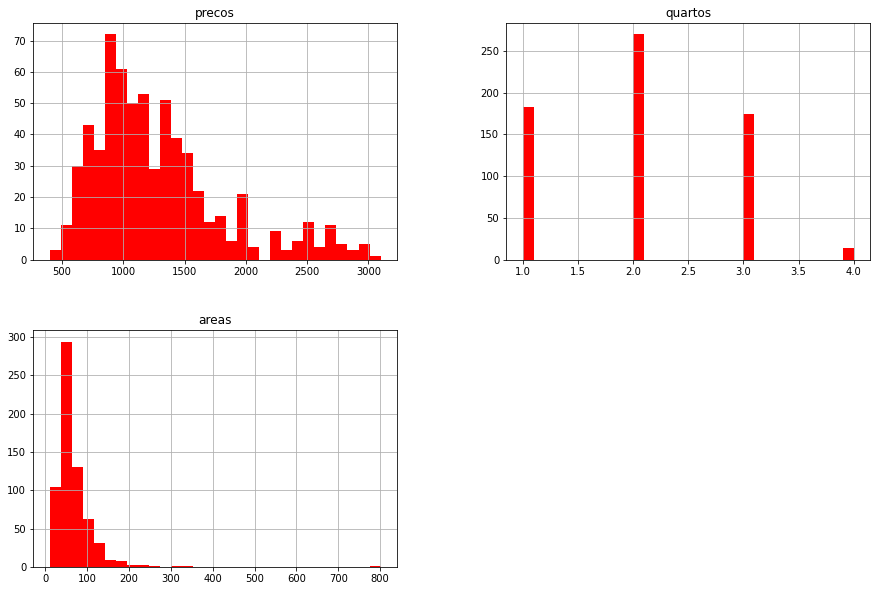

In [42]:
da_ml.hist(bins=30, figsize=(15, 10), color = 'r');

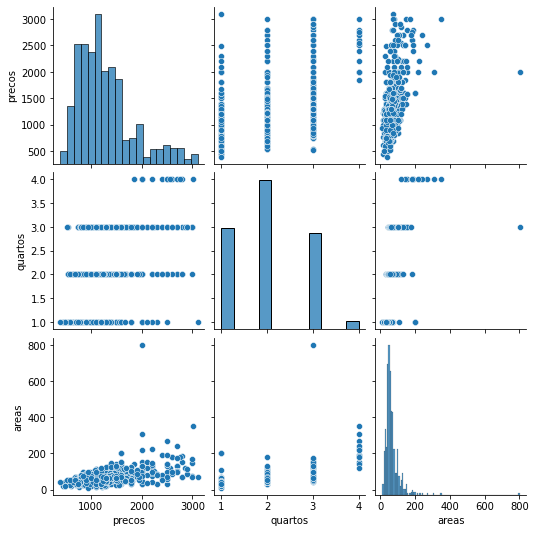

In [45]:
 sns.pairplot(da_ml)

In [ ]:
sns.pairplot

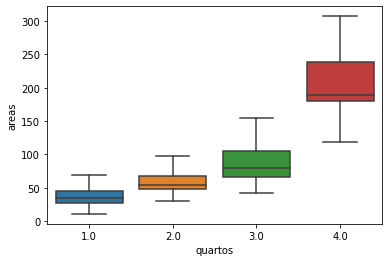

In [16]:
sns.boxplot(x="quartos", y="areas", data=da_ml, showfliers = False);

Text(0.5, 1.0, 'Correlation')

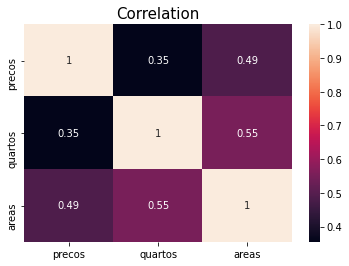

In [17]:
corrMatrix = sns.heatmap(da_ml.corr(), annot=True);
corrMatrix.set_title('Correlation', fontsize=15)

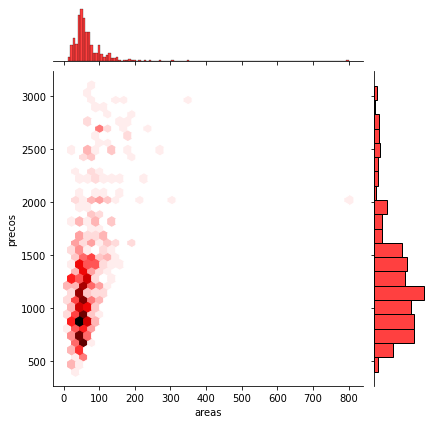

In [18]:
sns.jointplot(x="areas", y="precos", data=da_ml, kind="hex", color="r");

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



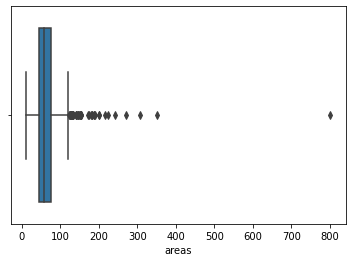

In [19]:
sns.boxplot(da_ml['areas']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



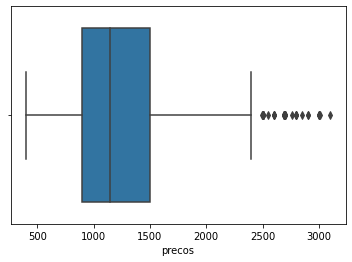

In [20]:
sns.boxplot(da_ml['precos']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



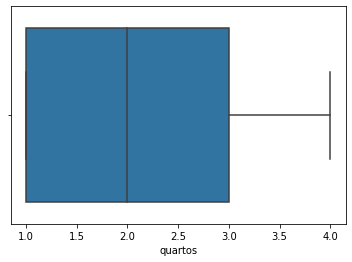

In [21]:
sns.boxplot(da_ml['quartos']);

In [47]:
da_ml

,bairro,precos,quartos,areas
0,Abranches,960.00,1.00,50.00
1,Abranches,862.00,1.00,40.00
2,Abranches,855.00,1.00,28.00
3,Abranches,855.00,1.00,28.00
4,Abranches,855.00,1.00,28.00
...,...,...,...,...
736,Xaxim,750.00,1.00,30.00
737,Xaxim,1100.00,3.00,100.00
738,Xaxim,1000.00,2.00,67.00
739,Xaxim,1100.00,2.00,54.00


In [48]:
da_ml.to_csv('data_rent_ap_curitiba_mercado_livre.csv')

In [22]:
da_group.head()

,precos,quartos,areas
bairro,,,
Campina do Siqueira,2200.00,2.00,70.00
Mossunguê,2000.00,3.00,79.00
Batel,1990.00,3.00,101.00
Hugo Lange,1950.00,3.00,81.00
Bigorrilho,1850.00,2.00,98.00


In [23]:
da_price = da_group.drop('quartos', 1).drop('areas', 1).reset_index()

In [24]:
da_price['bairro'] = da_price['bairro'].str.capitalize()

In [25]:
da_price.head()

,bairro,precos
0,Campina do siqueira,2200.00
1,Mossunguê,2000.00
2,Batel,1990.00
3,Hugo lange,1950.00
4,Bigorrilho,1850.00


In [27]:
db = gpd.read_file('DIVISA_DE_BAIRROS.shp')

In [28]:
db.head()

,OBJECTID,CODIGO,TIPO,NOME,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry
0,20,9.00,DIVISA DE BAIRROS,ÁGUA VERDE,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,4773046.30,9760.92,"POLYGON ((673879.287 7183803.691, 673907.541 7..."
1,22,18.00,DIVISA DE BAIRROS,JARDIM SOCIAL,Decreto Municipal 774 / 1975,1.00,REGIONAL MATRIZ,1958421.84,6055.95,"POLYGON ((678071.018 7187798.489, 678071.550 7..."
2,23,57.00,DIVISA DE BAIRROS,XAXIM,Decreto Municipal 774 / 1975,2.00,REGIONAL BOQUEIRÃO,9085390.75,13783.59,"POLYGON ((674448.852 7179898.885, 674532.900 7..."
3,5,22.00,DIVISA DE BAIRROS,JARDIM DAS AMÉRICAS,Decreto Municipal 774 / 1975,3.00,REGIONAL CAJURU,3859033.54,8818.50,"POLYGON ((678209.542 7181641.525, 678107.870 7..."
4,9,26.00,DIVISA DE BAIRROS,GUAÍRA,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,2311397.49,6351.96,"POLYGON ((672709.614 7181167.829, 672599.420 7..."


In [29]:
db['bairro'] = db['NOME'].str.capitalize()

In [31]:
db['bairro'] = db['bairro'].replace('Cidade industrial de curitiba', 'Cidade industrial')

In [32]:
merged = db.set_index('bairro').join(da_price.set_index('bairro'))
merged = merged.reset_index()
#merged = merged.fillna(0)

In [34]:
merged['precos'] = merged['precos'].fillna(merged.groupby('NM_REGIONA')['precos'].transform('median'))

In [36]:
merged.head()

,bairro,OBJECTID,CODIGO,TIPO,NOME,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry,precos
0,Água verde,20,9.00,DIVISA DE BAIRROS,ÁGUA VERDE,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,4773046.30,9760.92,"POLYGON ((673879.287 7183803.691, 673907.541 7...",1090.00
1,Jardim social,22,18.00,DIVISA DE BAIRROS,JARDIM SOCIAL,Decreto Municipal 774 / 1975,1.00,REGIONAL MATRIZ,1958421.84,6055.95,"POLYGON ((678071.018 7187798.489, 678071.550 7...",1200.00
2,Xaxim,23,57.00,DIVISA DE BAIRROS,XAXIM,Decreto Municipal 774 / 1975,2.00,REGIONAL BOQUEIRÃO,9085390.75,13783.59,"POLYGON ((674448.852 7179898.885, 674532.900 7...",970.00
3,Jardim das américas,5,22.00,DIVISA DE BAIRROS,JARDIM DAS AMÉRICAS,Decreto Municipal 774 / 1975,3.00,REGIONAL CAJURU,3859033.54,8818.50,"POLYGON ((678209.542 7181641.525, 678107.870 7...",957.50
4,Guaíra,9,26.00,DIVISA DE BAIRROS,GUAÍRA,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,2311397.49,6351.96,"POLYGON ((672709.614 7181167.829, 672599.420 7...",1090.00


In [37]:
 merged.groupby(['bairro']).median().sort_values('precos', ascending=True)

,OBJECTID,CODIGO,CD_REGIONA,SHAPE_AREA,SHAPE_LEN,precos
bairro,,,,,,
Cachoeira,60,51.00,4.00,3221611.22,8921.57,660.00
Campo de santana,52,71.00,12.00,21579444.88,26635.14,700.00
Tatuquara,49,74.00,12.00,11234800.38,21895.61,700.00
Caximba,46,70.00,12.00,8215223.22,16903.13,700.00
Fazendinha,30,42.00,7.00,3723681.44,8791.17,790.00
...,...,...,...,...,...,...
Bigorrilho,66,11.00,1.00,2896537.37,7938.14,1850.00
Hugo lange,2,17.00,1.00,1184234.49,4676.69,1950.00
Batel,39,10.00,1.00,1737732.42,5622.22,1990.00


In [38]:
 merged.groupby(['NM_REGIONA']).median().sort_values('precos', ascending=False)

,OBJECTID,CODIGO,CD_REGIONA,SHAPE_AREA,SHAPE_LEN,precos
NM_REGIONA,,,,,,
REGIONAL MATRIZ,23.50,10.50,1.00,1876561.14,6225.21,1350.00
REGIONAL SANTA FELICIDADE,69.00,48.00,5.00,3512540.74,10446.54,1295.00
REGIONAL PORTÃO,10.50,27.50,7.00,2284859.19,6949.10,1090.00
REGIONAL CIC,44.50,68.50,11.00,8355042.00,18813.55,1020.00
REGIONAL BOA VISTA,48.50,49.50,4.00,4237817.97,11098.51,1011.50
REGIONAL SANTA FELICIDADE / REGIONAL PORTÃO,33.00,44.00,5.00,8569837.61,16637.62,1000.00
REGIONAL CAJURU,30.00,21.50,3.00,4014396.44,9308.81,957.50
REGIONAL BOQUEIRÃO,34.00,56.50,2.00,10536322.74,16155.39,910.00
REGIONAL PINHEIRINHO,28.00,41.00,8.00,5049840.13,11816.64,900.00


In [39]:
merged.head()

,bairro,OBJECTID,CODIGO,TIPO,NOME,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry,precos
0,Água verde,20,9.00,DIVISA DE BAIRROS,ÁGUA VERDE,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,4773046.30,9760.92,"POLYGON ((673879.287 7183803.691, 673907.541 7...",1090.00
1,Jardim social,22,18.00,DIVISA DE BAIRROS,JARDIM SOCIAL,Decreto Municipal 774 / 1975,1.00,REGIONAL MATRIZ,1958421.84,6055.95,"POLYGON ((678071.018 7187798.489, 678071.550 7...",1200.00
2,Xaxim,23,57.00,DIVISA DE BAIRROS,XAXIM,Decreto Municipal 774 / 1975,2.00,REGIONAL BOQUEIRÃO,9085390.75,13783.59,"POLYGON ((674448.852 7179898.885, 674532.900 7...",970.00
3,Jardim das américas,5,22.00,DIVISA DE BAIRROS,JARDIM DAS AMÉRICAS,Decreto Municipal 774 / 1975,3.00,REGIONAL CAJURU,3859033.54,8818.50,"POLYGON ((678209.542 7181641.525, 678107.870 7...",957.50
4,Guaíra,9,26.00,DIVISA DE BAIRROS,GUAÍRA,Decreto Municipal 774 / 1975,7.00,REGIONAL PORTÃO,2311397.49,6351.96,"POLYGON ((672709.614 7181167.829, 672599.420 7...",1090.00


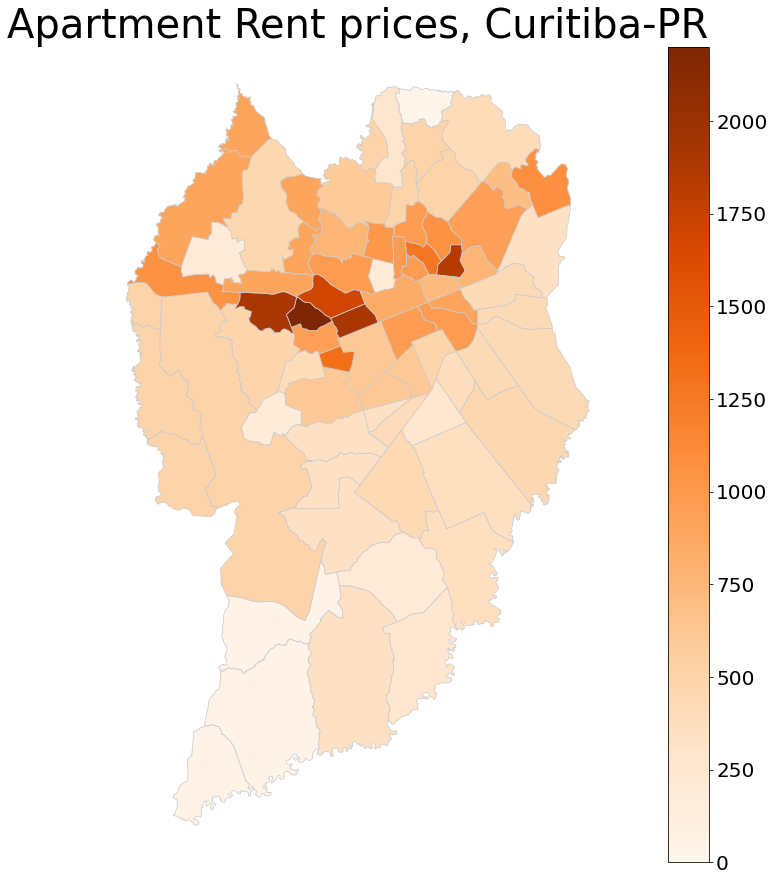

In [40]:
fig, ax = plt.subplots(1, figsize=(20, 15))
ax.axis('off')
ax.set_title('Apartment Rent prices, Curitiba-PR', fontdict={'fontsize': '40', 'fontweight' : '3'})
color = 'Oranges'
vmin, vmax = 0, 2200
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged.plot('precos', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))